# AUB ROBOTICS CLUB - Intro to Machine Learning Workshop 

Fall 2020 -2021

## **Supervised Learning Project**
###Introduction to Linear Rgression 
###Credit Card Approvals: Prediction 

**Project Description:**
*   Commercial banks receive a lot of applications for credit cards.
*   Manually analyzing these applications is mundane, error-prone, and time-consuming
*  In this project, you will build an automatic credit card approval predictor using machine learning techniques. (used in most of the banks)

For this, we will first inspect the data, prerpocess it, split the data into train and test sets, fit the model, make predictions, improve the model's performance.

Resources: UCI Machine Learning Repository 






***1 - Loading and Viewing the Dataset***

http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html

In [ ]:
#Import pandas
import pandas as pd

#Load the dataset
cc_apps = pd.read_csv("crx.csv",header = None)

#Inspect the data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


Probabl features: Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus.

**2 - Inspect the data**


In [ ]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

# Inspect missing values in the dataset
cc_apps.tail(17)


               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


**3 - Preprocessing**

- Handle the missing data



In [ ]:
#Remark that we have non-numeric and numeric data in the dataset
#The numeric values are from different ranges
#We have missing values 
#These can affect our model 

#First deal with the missing values
# Import numpy
import numpy as np 

# Inspect missing values in the dataset
print(cc_apps.tail(17))


# Replace the '?'s with NaN
cc_apps = cc_apps.replace(to_replace = '?', value = np.nan)

# Inspect the missing values again
cc_apps.tail(17)

#Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)

#Count the number of NaNs in the dataset for verification
print(cc_apps.isna().sum().sum())

# Iterate over each column of cc_apps
for col in cc_apps:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps.isna().sum().sum())

    0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
673  ?  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674  a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675  a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676  a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677  b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678  a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679  a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680  b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681  b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682  b  17.08   3.290  u  g   i   v  0.335  f  f   0  t  g  00140    2  -
683  b  36.42   0.750  y  p   d   v  0.585  f  f   0  f  g  00240    3  -
684  b  40.58   3.290  u  g   m   v  3.500  f  f   0  t  s  00400    0  -
685  b  21.08  10.085  y  p   e   h  1

- preprocess the data 


In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps:
    # Compare if the dtype is object
    if cc_apps[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])

**4- Splitting the dataset into train and test data**

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop([11, 13], axis=1)
cc_apps = cc_apps.values

# Segregate features and labels into separate variables
X,y = cc_apps[:,0:] , cc_apps[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size= 0.33,
                                random_state= 42)

#Preprocess for scaling 
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

**5-Fitting a logistic regression model to the train set**

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

**6- Making predictions and evaluating performance**

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  1.0


array([[103,   0],
       [  0, 125]])

** 7 - Making the model perform better**

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, max_iter = max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator = logreg, param_grid= param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX,y)

# Summarize results
best_score, best_params = grid_model_result.best_score_,  grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))


Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}


## **Unsupervised Learning Project**
##Reducing Traffic Mortality 

USA Dataset


**Project Description**
- Increase in the number of fatal accidents daths
- Find a strategy to reduce road accidents
- We focus n USA since we have clear dataset
- Understand if there is any pattern 
- Derive suggestions for policy action plan

-Use of unsupervised clustering
Resources: https://github.com/fivethirtyeight/data.git


 **1 - Inspect the data**

In [11]:
# Import the `pandas` module as "pd"
import pandas as pd

# Read in `bad-drivers.csv`
car_acc = pd.read_csv("bad-drivers.csv")

# Save the number of rows columns as a tuple
rows_and_cols = car_acc.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

# Generate an overview of the DataFrame
car_acc_information = car_acc.info()
print(car_acc_information)

# Display the last five rows of the DataFrame
car_acc.tail()

There are 51 rows and 8 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   State                                                                                                   51 non-null     object 
 1   Number of drivers involved in fatal collisions per billion miles                                        51 non-null     float64
 2   Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                    51 non-null     int64  
 3   Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                            51 non-null     int64  
 4   Percentage Of Drivers Involved In Fatal Collisions Who Were N

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
46,Virginia,12.7,19,27,87,88,768.95,153.72
47,Washington,10.6,42,33,82,86,890.03,111.62
48,West Virginia,23.8,34,28,97,87,992.61,152.56
49,Wisconsin,13.8,36,33,39,84,670.31,106.62
50,Wyoming,17.4,42,32,81,90,791.14,122.04


 **2- Data Summary**

       Number of drivers involved in fatal collisions per billion miles  ...  Losses incurred by insurance companies for collisions per insured driver ($)
count                                          51.000000                 ...                                          51.000000                           
mean                                           15.790196                 ...                                         134.493137                           
std                                             4.122002                 ...                                          24.835922                           
min                                             5.900000                 ...                                          82.750000                           
25%                                            12.750000                 ...                                         114.645000                           
50%                                            15.600000              

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


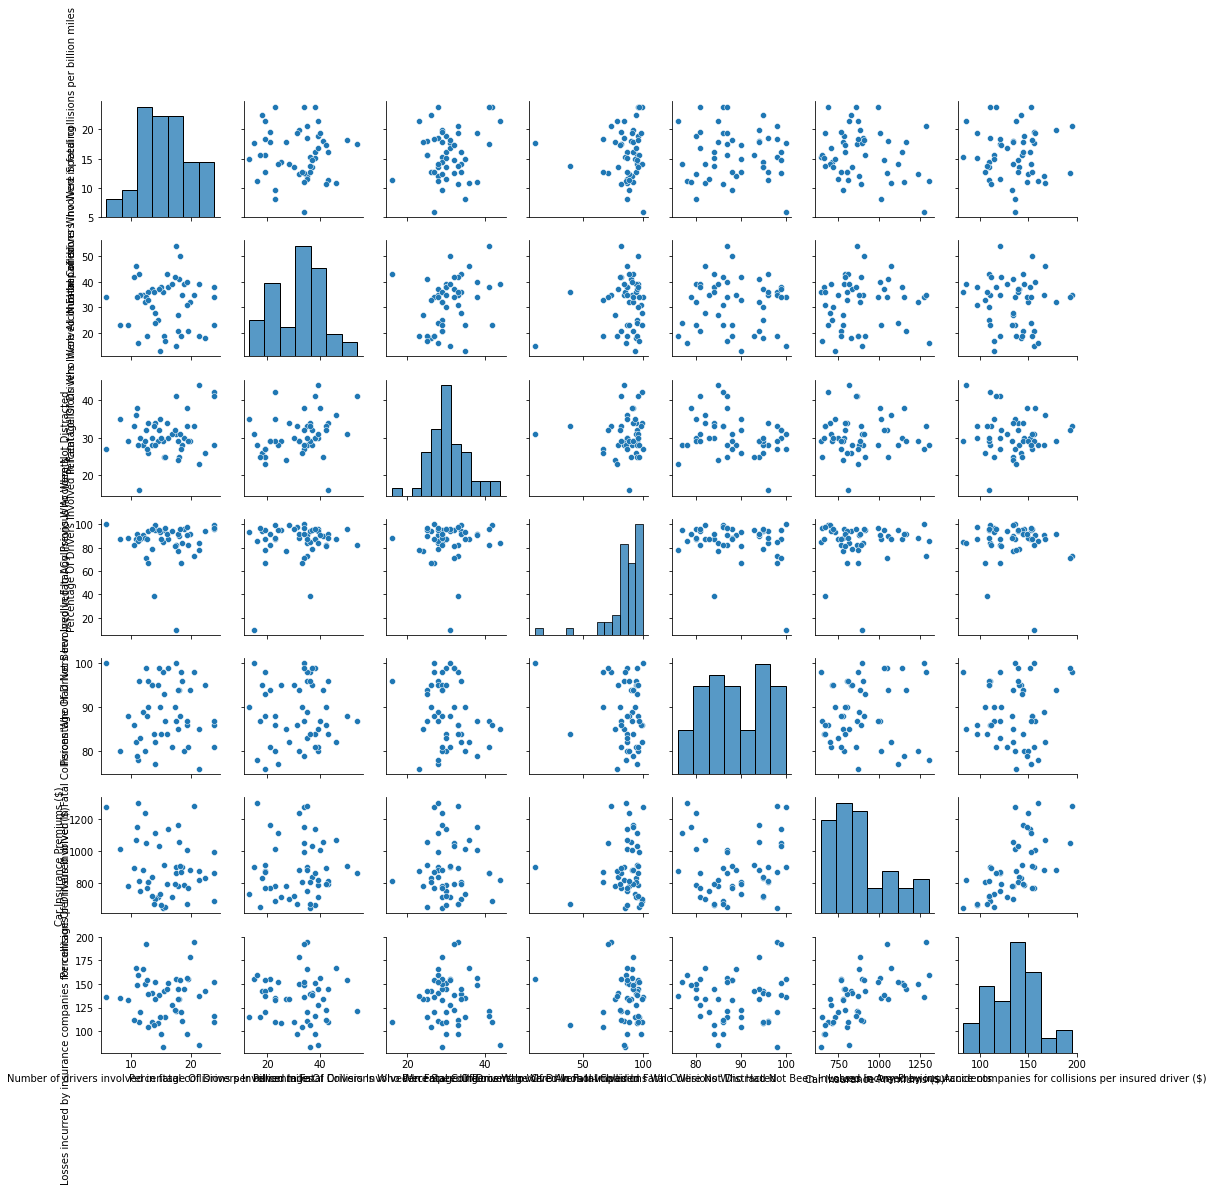

In [12]:
# import seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline

# Compute the summary statistics of all columns in the `car_acc` DataFrame
sum_stat_car = car_acc.describe()
print(sum_stat_car)

# Create a pairwise scatter plot to explore the data
sns.pairplot(car_acc)

**3 - Understand the data** 

```
# This is formatted as code
```



In [13]:
# Compute the correlation coefficent for all column pairs
corr_columns = car_acc.corr()
corr_columns

,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
Number of drivers involved in fatal collisions per billion miles,1.000000,-0.029080,0.199426,0.009782,-0.017942,-0.199702,-0.036011
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,-0.029080,1.000000,0.286244,0.131738,0.014066,0.042541,-0.061241
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,0.199426,0.286244,1.000000,0.043380,-0.245455,-0.017451,-0.083916
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,0.009782,0.131738,0.043380,1.000000,-0.195265,0.019578,-0.058467
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,-0.017942,0.014066,-0.245455,-0.195265,1.000000,0.075533,0.042770
Car Insurance Premiums ($),-0.199702,0.042541,-0.017451,0.019578,0.075533,1.000000,0.623116
Losses incurred by insurance companies for collisions per insured driver ($),-0.036011,-0.061241,-0.083916,-0.058467,0.042770,0.623116,1.000000


**** 4- Fit Multivariat Linear Regression** **

In [15]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = car_acc[['Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding', 'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired', 'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents']]
target = car_acc['Number of drivers involved in fatal collisions per billion miles']

# Create a linear regression object
reg = linear_model.LinearRegression()

# Fit a multivariate linear regression model
reg.fit(features, target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

**5 - Preprocssing**

The cumulative variance of the first two principal componenets is 0.7947


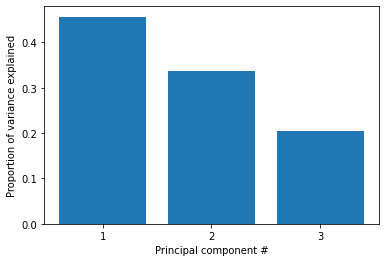

In [16]:
# Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Import the PCA class from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal componenets is {}".format(
    round(two_first_comp_var_exp, 5)))

**6 - Visualization**

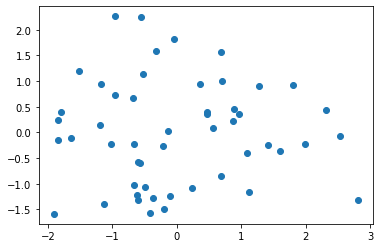

In [18]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)



**7 - Find Cluster in the data**

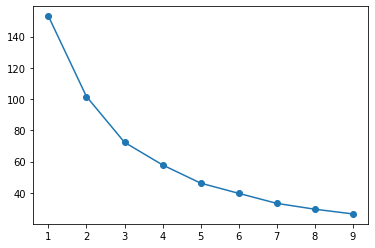

In [19]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# A loop will be used to plot the explantory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusers (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

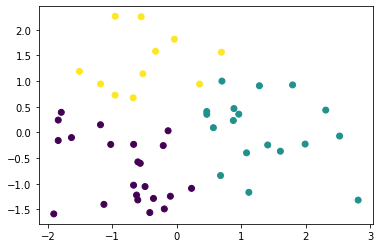

In [21]:
# Create a KMeans object with 3 clusters 
km = KMeans(n_clusters=3, random_state=8)
# Fit the data to the `km` object
km.fit(features_scaled)
# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_)



** 8 - **Visualize the feature differences**

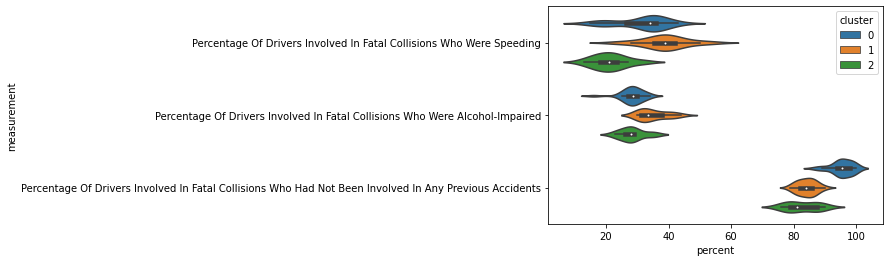

In [23]:
# Create a new column with the labels from the KMeans clustering
car_acc['cluster'] = km.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(car_acc, id_vars='cluster', var_name='measurement', value_name='percent',
                   value_vars=['Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding', 'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired', 'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents'])

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(y='measurement', x='percent', data=melt_car, hue='cluster')

Conclusion?